## Beginner Tutorial on Spectral Remote Sensing and Band Math

One of the great aspects of working with satellite imagery is all the additional data accompanies an image of the earth compared to your standard RGB from a traditional camera.  This extra data is because most satellites have camera-like instruments known as imaging spectrometers. These imaging spectrometers collect reflected light in what scientists call “bands.”  The additional "bands" of data give us marveous additional data for analyzing and understanding images of the earth.  Each "band" in turn represents a segment of the electomagnetic spectrum. The RGB bands from traditional cameras represent the "Red", "Green" and "Blue" segments of the spectrum.

DigitalGlobe imagery provides a wide swath of spectral band options.  For example our Worldview 3 satellite provides the following bands:

**8 Multispectral:**
Coastal: 397–454 nm        Red: 626–696 nm
Blue: 445–517 nm           Red Edge: 698–749 nm
Green: 507–586 nm          Near-IR1: 765–899 nm
Yellow: 580–629 nm         Near-IR2: 857–1039 nm

**8 SWIR Bands:**
SWIR-1: 1184–1235 nm       SWIR-5: 2137–2191 nm
SWIR-2: 1546–1598 nm       SWIR-6: 2174–2232 nm
SWIR-3: 1636–1686 nm       SWIR-7: 2228–2292 nm
SWIR-4: 1702–1759 nm       SWIR-8: 2285–2373 nm

**12 CAVIS Bands:**
Desert Clouds: 405–420 nm  Water-3: 930–965 nm
Aerosol-1: 459–509 nm      NDVI-SWIR: 1220–1252 nm
Green: 525–585 nm          Cirrus: 1365–1405 nm
Aerosol-2: 635–685 nm      Snow: 1620–1680 nm
Water-1: 845–885 nm        Aerosol-1: 2105–2245 nm
Water-2: 897–927 nm        Aerosol-2: 2105–2245 nm

**Panchromatic:** 450–800 nm

One the many ways we can utilize these various "bands" in satellite iamgery is by creating spectral indices.  Remote sensing scientists have used spectral indices to help them predict, model, or infer processes on the surface of the earth.  One of the most popular and easiest spectral indices to calcualte if the detection of vegetation in a satellite imagery.  Detection of vegetation is predicated on the fact that plants relfect light in the "near infared" band and less strongly in the visible segments of the spectrum.  The most common computational approach to leveraging this aspect of vegetation refletivity is NDVI (Normalized Difference Vegetation Index).  In order to calculate NDVI we'll normalize reflectivty between zero and one then create a ratio of the difference between the "near infrared"band and the "red" band divided by the sum of the two.  Let's do this in code.  First we'll select an image from DigitalGlobe's repository using the side bar in this noteobook.  Click on the "imagery" tab in the left hand selection of button to the left of this cell.  Either zoom into an area of interest of type the name of location into the gazeteer. For my analysis I've selected an agriucultural area surrounding Sterling, KS with lots of crop circles.

Fetching Image... 510 tiles


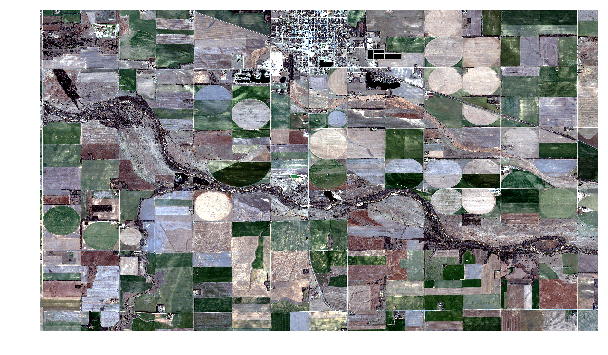

In [37]:
from gbdxtools.task import env
from gbdxtools import CatalogImage

catalog_id = env.inputs.get('catalog_id', '1030010065BF3C00')
bbox = env.inputs.get('bbox', '-98.27133178710938, 38.13968537472959, -98.13743591308595, 38.21660216585436')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

Now that we have an interesting image to work with we'll construct the equation to calculate our NDVI index. Next we need to identify the appropriate bands to calculate our index.  In Python we start with 0 and assign band sequentially across the spectrum:

**0** = **Coastal Blue** - Absorbed by chlorophyll in healthy plants and aids in conducting vegetative analysis. Least absorbed by water, and will be very useful in bathymetric studies. Substantially influenced by atmosphericm scattering and has the potential to improve atmospheric correction techniques. 

**1** = **Blue** - Readily absorbed by chlorophyll in plants. Provides good penetration of water. Less affected by atmospheric scattering and absorption compared to the Coastal Blue band.  

**2** = **Green** - Able to focus more precisely on the peak reflectance of healthy vegetation. Ideal for calculating plant vigor. Very helpful in discriminating between types of plant material when used in conjunction with the Yellow band.  

**3** = **Yellow** - Very important for feature classification. Detects the “yellowness” of particular vegetation, both on land and in the water.  

**4** = **Red** -  Focused on the absorption of red light by chlorophyll in healthy plant materials. One of the most important bands for vegetation discrimination. Useful in classifying bare soils, roads, and geological features.  


**5** = **Red Edge** - Centered strategically at the onset of the high reflectivity portion of vegetation response. Very valuable in measuring plant health and aiding in the classification of vegetation.  

**6** = **NIR1** - Very effective for the estimation of moisture content and plant biomass. Effectively separates water bodies from vegetation, identifies types of vegetation and also discriminates between soil types.  

**7** = **NIR2** - Overlaps the NIR1 band but is less affected by atmospheric influence. Enables broader vegetation analysis and biomass studies.    

To calculte NDVI we'll take the red band "4" and the NIR1 band "6" to create our equation. The code for the NDVI equation is shown below.

In [38]:
import numpy as np

red = image[4,:,:]
nir = image[6,:,:]
ndvi = np.clip((nir - red)/(nir + red), -1, 1)

With our computation in place we can now plot the result and see what the reults look like.

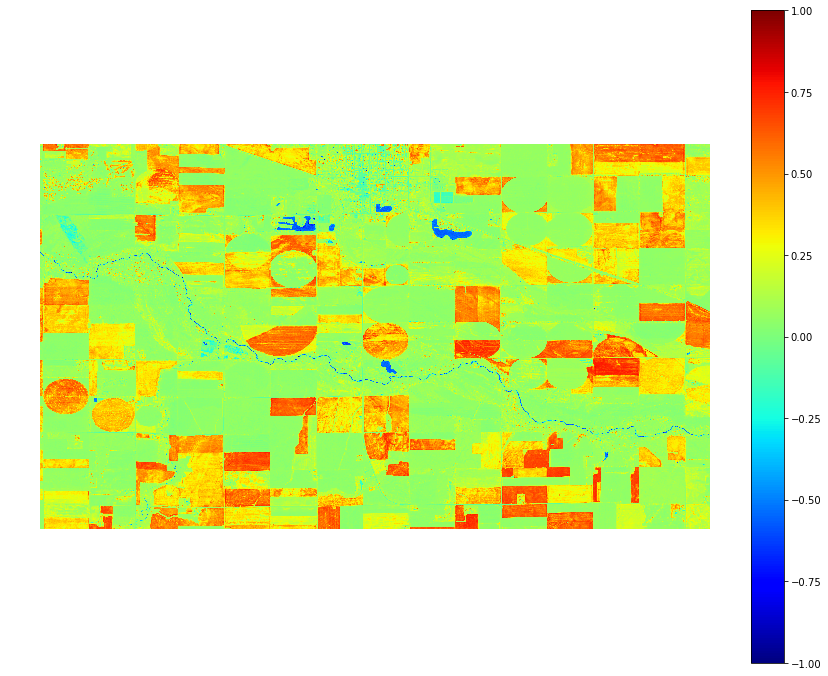

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(image, w=15, h=12, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()

plot(ndvi)

The result of plotting our NDVI result are slight non-intuoitive because high vegetation is plotted in red, moderated vegetation in green and low vegetation in blue.  The bright red areas are active fields and the green areas are lrgely harvested fields.  In addition the blue areas are largely water bodies like ponds and rivers.  Pretty quckly we can see how leveraging simple ratios of bands give us unique perspectives on the data in satellite images. In short there is some much more we can do with satellites than take pictues of your house.

To provide an idea of the diverse indices you can create with satellite imagery here is quick sample:

**GEMI** =	Global Environmental Monitoring Index  
**NBRI** =	Normalised Burn Ratio Index  
**NDWI** =	Normalised Difference Water Index  
**SLAVI** =	Specific Leaf Area Vegetation Index  
**SAVI** =	Soil Adjusted Vegetation Index  
**FMR** =    Ferrous Minerals Ration  
**NDBI** =   Normalized Difference Built-Up Index   
**II** = Iron Index

All of these indexes and many more are simple to implement following the same pattern seen above. Let's test this out by trying out an additional index. Specfically we'll calculate the iron oxide ratio for an area of interest.   To test out the creating and iron ratio we need to test it out in an interesting geography.  In this case we'll search and insert imagery for the Tucson Arizona airplane graveyard.  Technically the iron index is used for mineraal analysis, but running it over rusty airplanes is a fun way to see a distinct result.


Fetching Image... 9 tiles


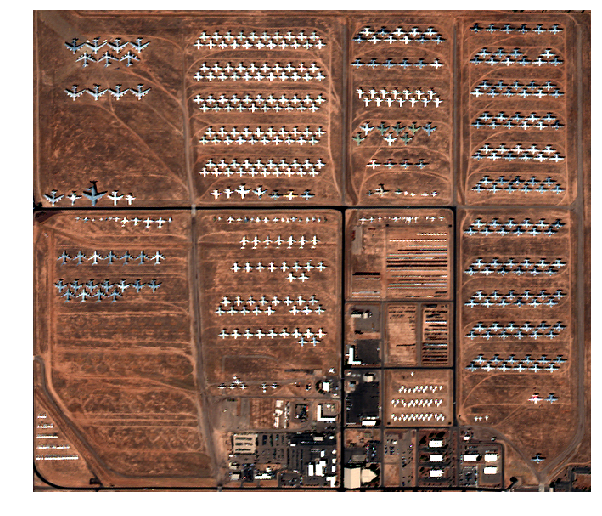

In [53]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '104001002E408800')
bbox = env.inputs.get('bbox', '-110.85793018341066, 32.16286146889386, -110.84132194519044, 32.17721048595639')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

In [54]:
red = image[4,:,:]
blue = image[1,:,:]
green = image[2,:,:]
yellow = image[3,:,:]
ii = (green*yellow)/(blue*1000)

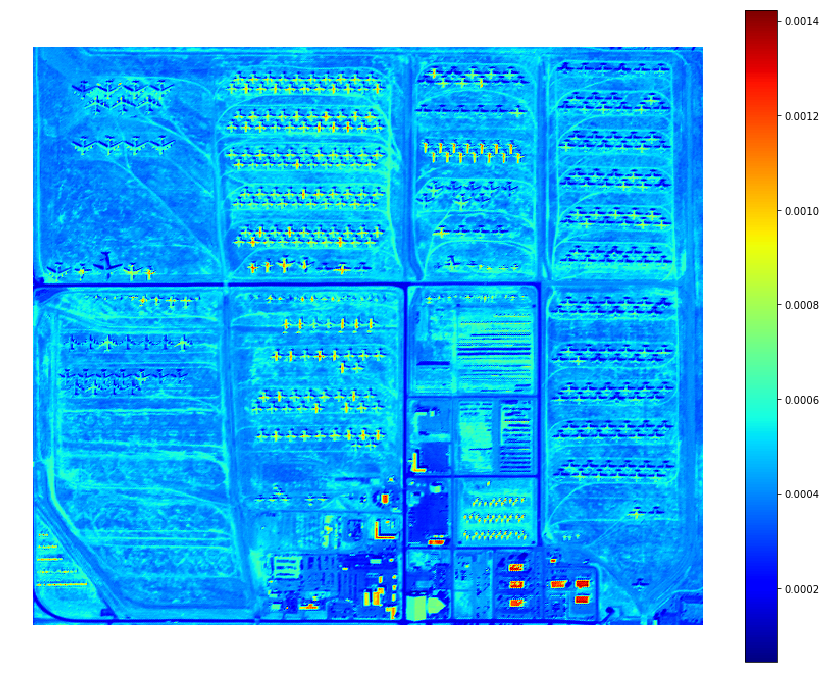

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(image, w=15, h=12, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()

plot(ii)

Sure enough the iron index identifies several airplanes and roofs to boot.  Presumbly the airplanes that show up are those whose paints has begun to wear away.  While this index gives an interesting perspective it is not custom built for the job.

Since we have imagery from a DigitalGlobe Worldview satellite we have a few extra bands we can use to more directly tackle the problem of feature indentification.  The WorldView Non-Homogeneous Feature Difference (WV-NHFD) uses WorldView-2 bands to identify features that contrast highly against the background. This would include airplanes, paved surfaces and roofs in the case of our Tuscon graveyard image above.  Let's test out this concept by adding "red edge" and "coastal" bands to our equation and create a normalized difference. 

In [56]:
red_edge = image[5,:,:]
coastal = image[0,:,:]
nhfb = (coastal - red_edge)/(coastal + red_edge)

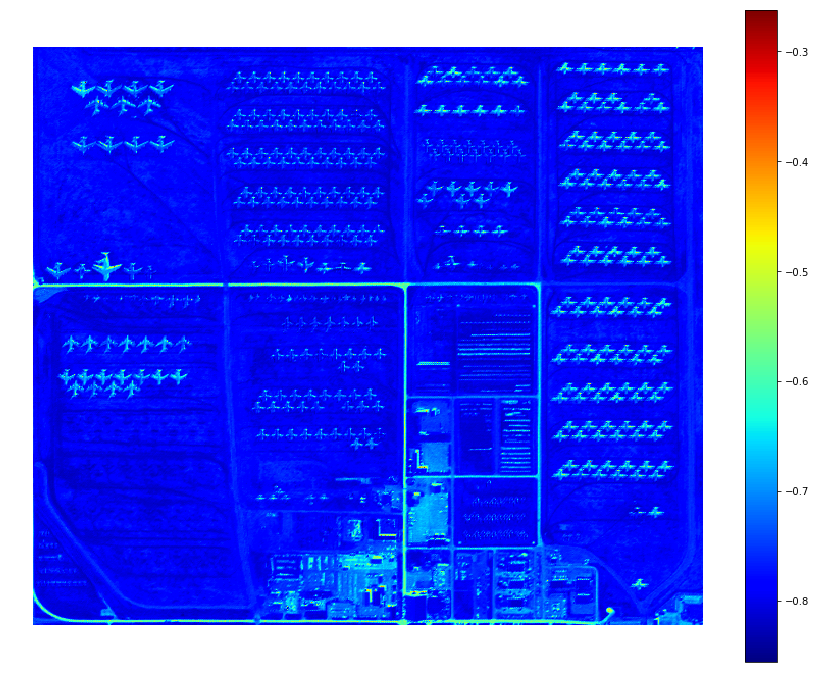

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(image, w=15, h=12, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()

plot(nhfb)

The results live up to the spectral idexes billing and we get some very clear feature identification for airplanes, roads and parking lots. The building roofs are less obvious but still somewhat evident.  Spectral indices provide a massive swath of possbilities for using band math.  If you want a smogersboard of indexes to play more with check out https://www.indexdatabase.de/db/i.php.